In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_curve

def save_to_file(objeto, nome_arquivo):
    with open(nome_arquivo, 'wb') as output:
        pickle.dump(objeto, output, pickle.HIGHEST_PROTOCOL)


def load_file(nome_arquivo):
    with open(nome_arquivo, 'rb') as input:
        objeto = pickle.load(input)
    return objeto

In [3]:
vector_img = load_file('train_images_outrun_position_Score_processed.pkl')

In [4]:
imgs = []
numbers = []
for i in list(vector_img.keys()):
    if vector_img[i][0].shape == (220, 320):
        imgs.append(np.expand_dims(vector_img[i][0][140:,50:250],axis=-1))
    else:
        imgs.append(np.expand_dims(vector_img[i][0],axis=-1))
    numbers.append(vector_img[i][1])

In [5]:
pd.Series(numbers).value_counts(normalize=True)

 0.9    0.351212
 0.8    0.225374
 0.7    0.096441
-0.5    0.063950
 0.6    0.058793
 0.0    0.047963
 0.5    0.042806
-0.1    0.040227
 0.4    0.023724
 0.3    0.017019
 0.2    0.009799
 0.1    0.008252
-0.3    0.008252
-0.2    0.003610
-0.9    0.001547
-0.4    0.001031
dtype: float64

In [6]:
imgs = np.array(imgs)

In [7]:
numbers = np.array(numbers)

In [8]:
imgs.shape

(1939, 80, 200, 1)

In [9]:
imgs[0][:,:,0].shape

(80, 200)

# Creating Model

In [10]:
input_shape =  (80, 200, 1)
print(input_shape)

(80, 200, 1)


In [11]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Lambda(lambda x: x/255,input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=input_shape))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [12]:
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer="Adam", metrics=["accuracy"])

In [13]:
model.fit(imgs, numbers, batch_size = 32, epochs=10)

Train on 1939 samples
Epoch 1/10
1939/1939 [==============================] - 40s 21ms/sample - loss: 1.0319 - accuracy: 0.0356
Epoch 2/10
1939/1939 [==============================] - 8s 4ms/sample - loss: 0.1080 - accuracy: 0.0438
Epoch 3/10
1939/1939 [==============================] - 8s 4ms/sample - loss: 0.0591 - accuracy: 0.0480
Epoch 4/10
1939/1939 [==============================] - 8s 4ms/sample - loss: 0.0459 - accuracy: 0.0480
Epoch 5/10
1939/1939 [==============================] - 8s 4ms/sample - loss: 0.0385 - accuracy: 0.0480
Epoch 6/10
1939/1939 [==============================] - 7s 4ms/sample - loss: 0.0333 - accuracy: 0.0480
Epoch 7/10
1939/1939 [==============================] - 8s 4ms/sample - loss: 0.0295 - accuracy: 0.0480
Epoch 8/10
1939/1939 [==============================] - 8s 4ms/sample - loss: 0.0259 - accuracy: 0.0480
Epoch 9/10
1939/1939 [==============================] - 10s 5ms/sample - loss: 0.0236 - accuracy: 0.0480
Epoch 10/10
1939/1939 [================

In [16]:
model.save_weights('model_position_score_outrun.h5')

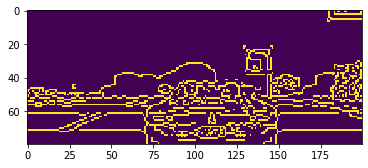

614 --- 0.6 --- [0.6600464]


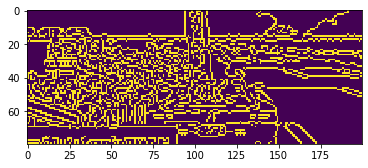

910 --- -0.5 --- [-0.04308682]


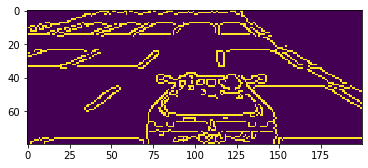

603 --- 0.6 --- [0.59386283]


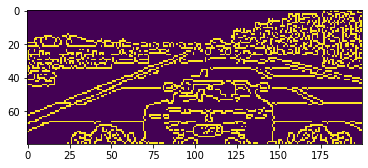

1934 --- 0.6 --- [0.66472]


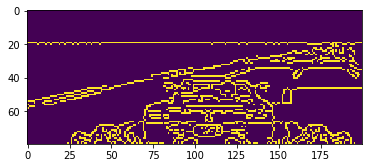

1308 --- 0.8 --- [0.8248573]


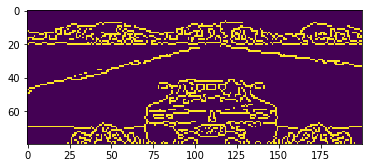

70 --- 0.9 --- [0.80794257]


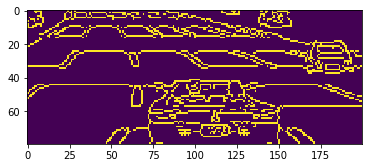

1090 --- 0.9 --- [0.9650902]


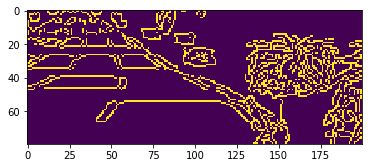

559 --- -0.5 --- [-0.04308682]


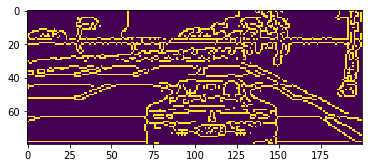

476 --- 0.5 --- [0.60464627]


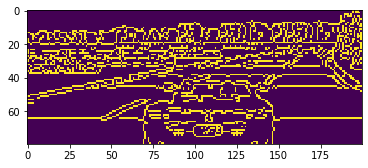

1776 --- 0.8 --- [0.8759532]


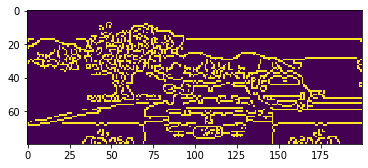

1518 --- 0.7 --- [0.708804]


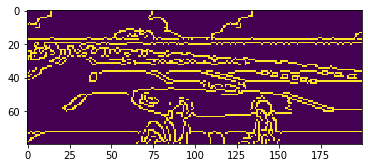

626 --- -0.5 --- [-0.04308682]


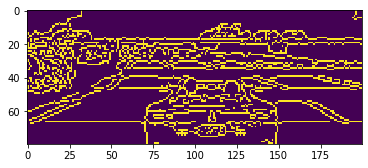

550 --- 0.8 --- [0.86826634]


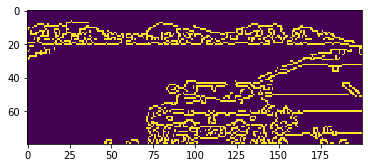

1651 --- -0.5 --- [-0.04308682]


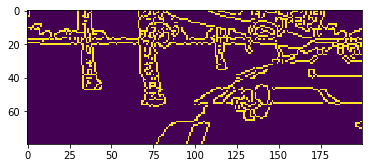

315 --- -0.1 --- [-0.04308682]


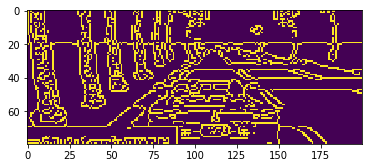

919 --- 0.4 --- [0.47105473]


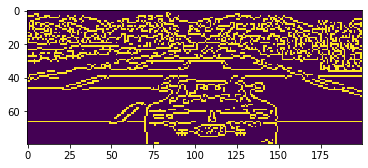

238 --- 0.8 --- [0.8141926]


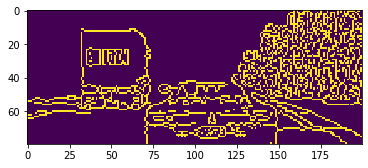

1882 --- 0.7 --- [0.6600739]


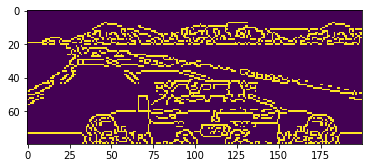

1327 --- 0.9 --- [0.8726016]


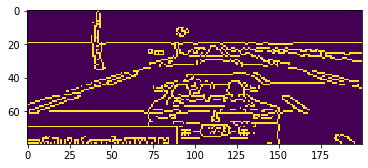

786 --- 0.9 --- [0.9238885]


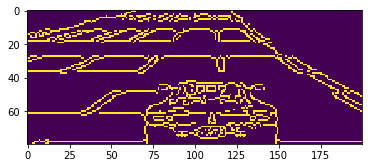

602 --- 0.6 --- [0.6166027]


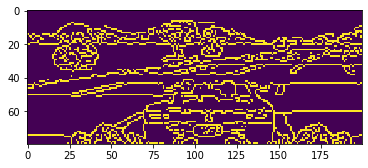

1565 --- 0.9 --- [0.92335075]


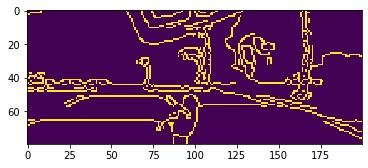

424 --- -0.5 --- [-0.04308682]


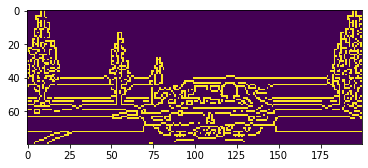

310 --- 0.9 --- [0.87298644]


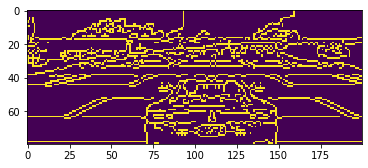

705 --- 0.9 --- [0.9883689]


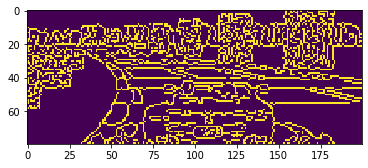

1907 --- 0.1 --- [0.2238344]


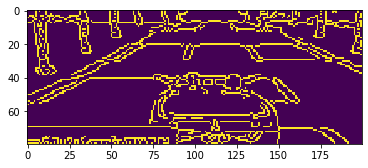

844 --- 0.9 --- [0.9889198]


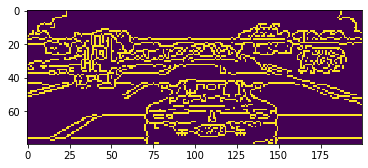

1068 --- 0.6 --- [0.68411475]


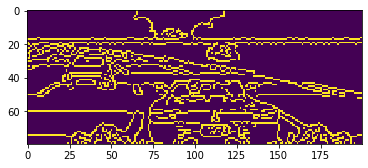

1159 --- 0.7 --- [0.7235934]


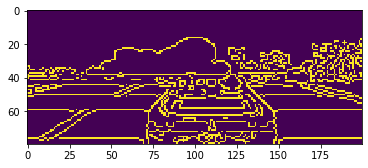

612 --- 0.6 --- [0.6976658]


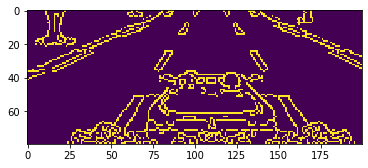

187 --- 0.9 --- [0.9605208]


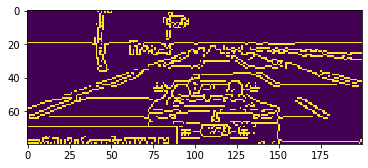

787 --- 0.9 --- [0.94864374]


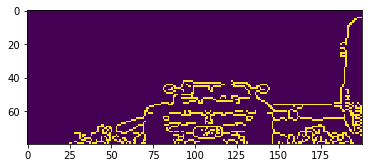

1904 --- 0.4 --- [0.5468922]


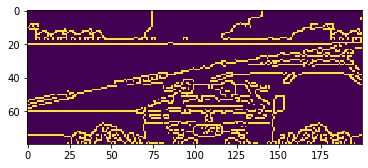

33 --- 0.8 --- [0.9261023]


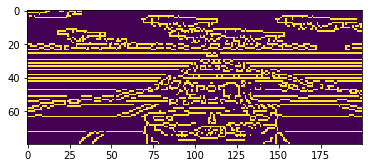

139 --- 0.9 --- [0.8210946]


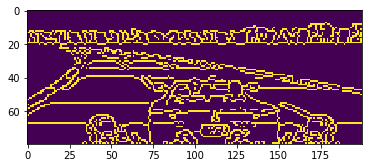

1676 --- 0.8 --- [0.82637405]


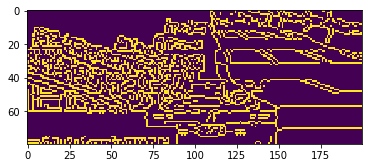

923 --- -0.4 --- [-0.04308682]


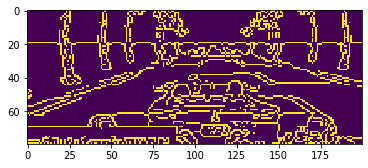

374 --- 0.9 --- [0.9460969]


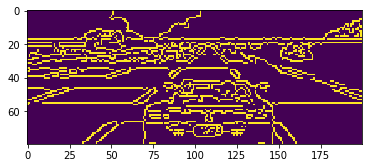

1146 --- 0.9 --- [0.9411478]


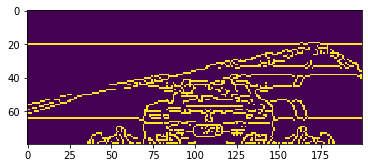

1309 --- 0.8 --- [0.90008533]


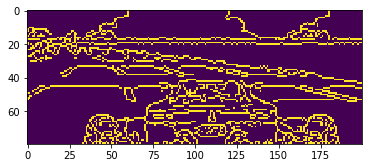

641 --- 0.8 --- [0.7698907]


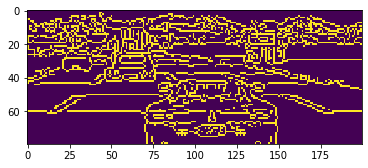

68 --- 0.8 --- [0.8782601]


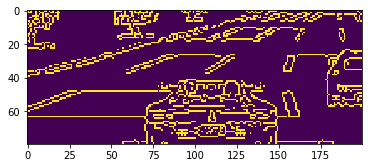

1561 --- 0.9 --- [0.9446605]


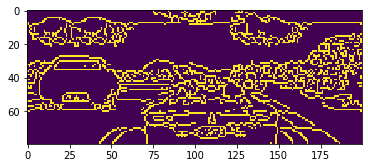

1364 --- 0.4 --- [0.47057503]


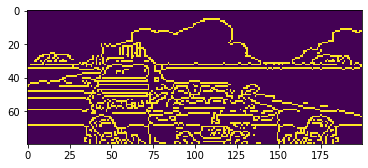

1238 --- 0.5 --- [0.6191644]


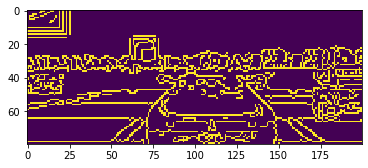

1706 --- 0.9 --- [0.8401726]


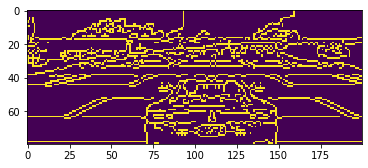

705 --- 0.9 --- [0.9883689]


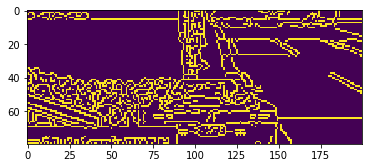

837 --- -0.1 --- [-0.04308682]


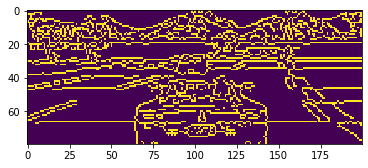

218 --- 0.9 --- [0.94999385]


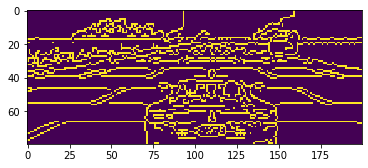

675 --- 0.9 --- [0.93927586]


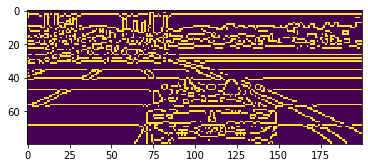

94 --- 0.6 --- [0.74850714]


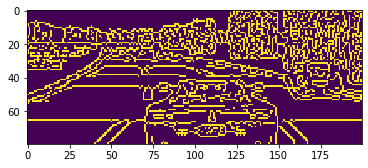

1814 --- 0.8 --- [0.791906]


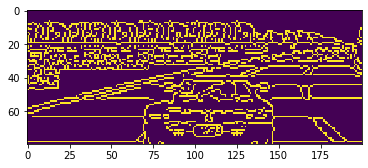

1793 --- 0.7 --- [0.74415576]


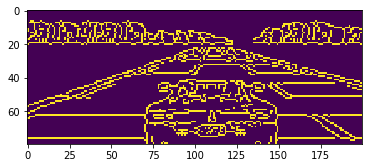

1668 --- 0.8 --- [0.8166522]


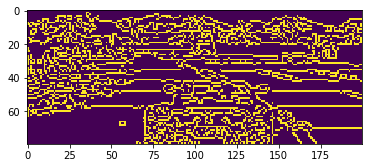

178 --- -0.5 --- [-0.04308682]


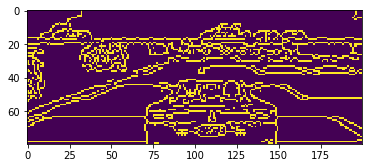

547 --- 0.8 --- [0.8716255]


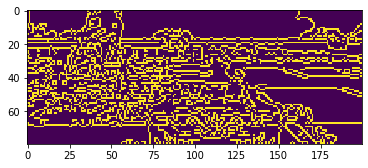

716 --- -0.5 --- [-0.04308682]


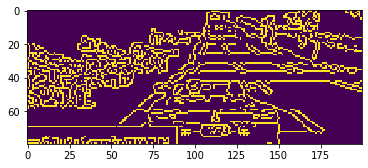

809 --- 0.1 --- [0.23815447]


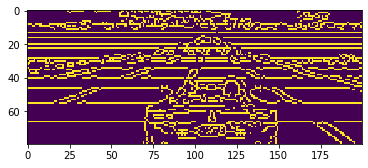

217 --- 0.9 --- [0.9404078]


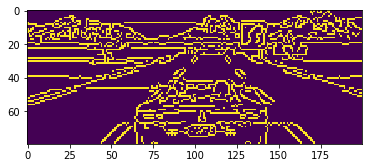

120 --- 0.9 --- [0.99899155]


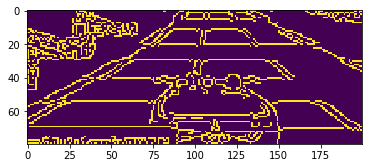

898 --- 0.9 --- [1.0006089]


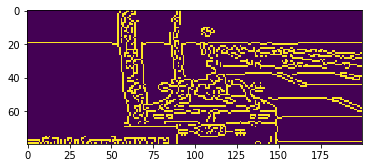

762 --- -0.5 --- [-0.04308682]


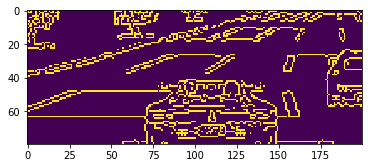

1561 --- 0.9 --- [0.9446605]


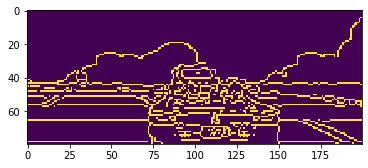

1233 --- 0.8 --- [0.8313815]


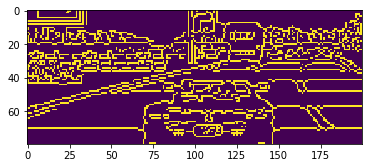

98 --- 0.7 --- [0.8109401]


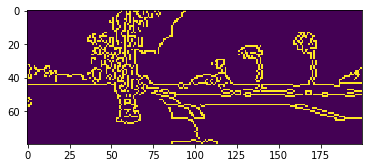

433 --- 0.0 --- [-0.04308682]


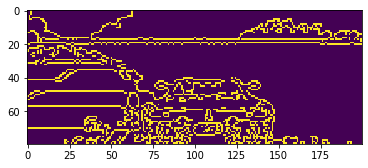

743 --- -0.5 --- [-0.04308682]


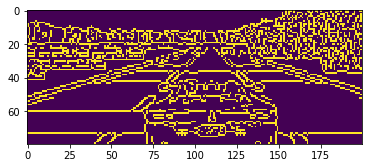

1803 --- 0.7 --- [0.74575305]


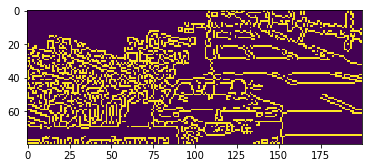

810 --- -0.1 --- [-0.04308682]


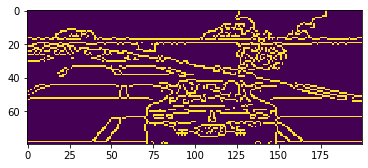

734 --- 0.5 --- [0.65558326]


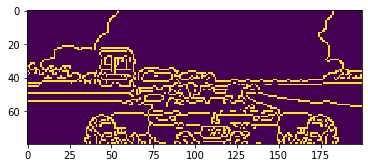

1237 --- 0.9 --- [0.9210209]


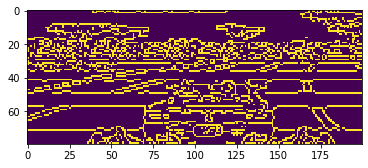

158 --- 0.9 --- [0.980388]


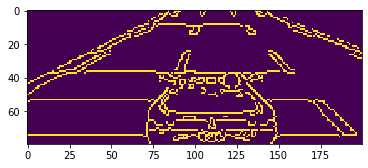

1491 --- 0.9 --- [0.8516639]


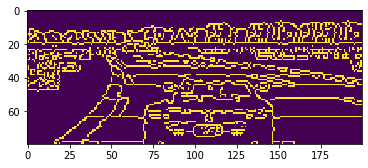

59 --- 0.9 --- [0.82889634]


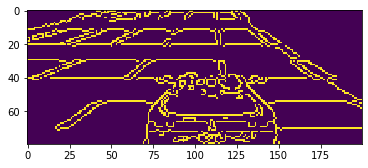

607 --- 0.6 --- [0.63805544]


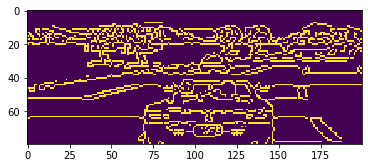

1540 --- 0.7 --- [0.78803337]


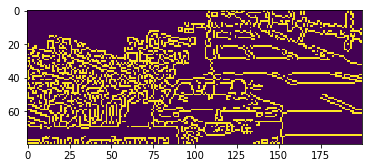

810 --- -0.1 --- [-0.04308682]


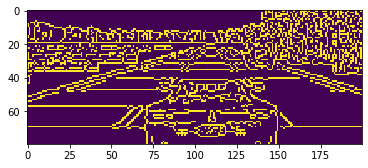

1810 --- 0.8 --- [0.74394554]


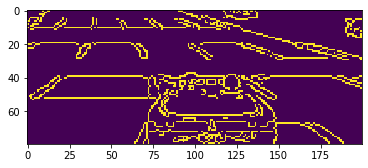

580 --- 0.8 --- [0.7974164]


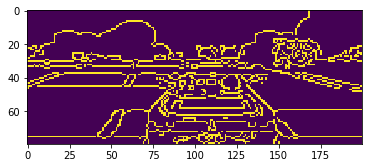

590 --- 0.8 --- [0.88194627]


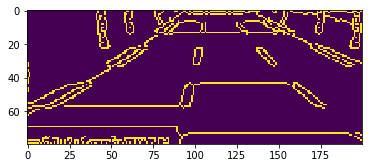

917 --- 0.0 --- [0.06637192]


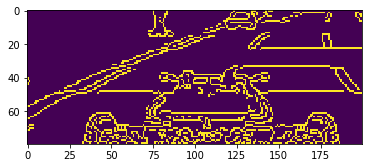

1462 --- 0.7 --- [0.78813374]


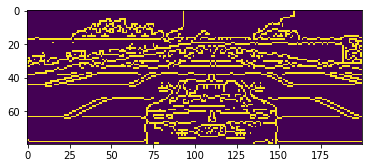

679 --- 0.9 --- [0.99085706]


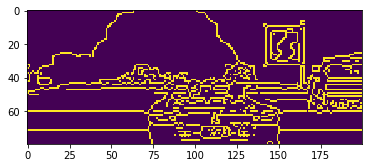

1216 --- 0.5 --- [0.6774319]


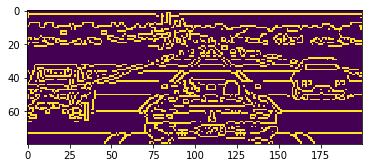

86 --- 0.9 --- [0.8954804]


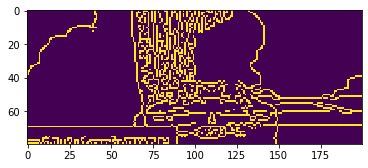

894 --- 0.0 --- [0.20405254]


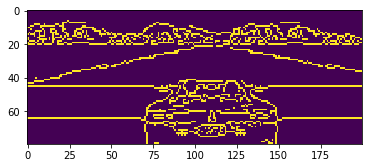

1341 --- 0.9 --- [0.92963606]


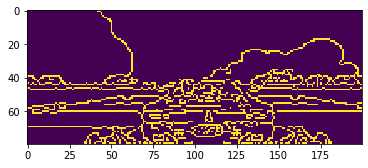

1283 --- 0.9 --- [0.9477985]


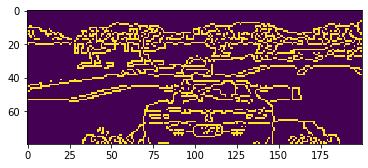

1543 --- 0.8 --- [0.7913251]


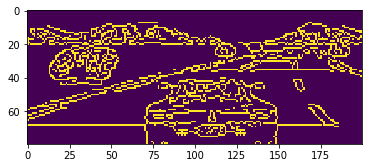

1384 --- 0.9 --- [0.8742138]


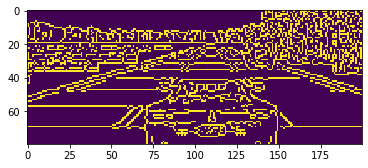

1810 --- 0.8 --- [0.74394554]


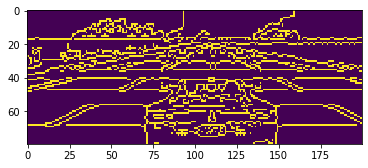

684 --- 0.9 --- [0.94634306]


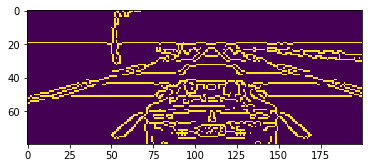

356 --- 0.9 --- [0.9813079]


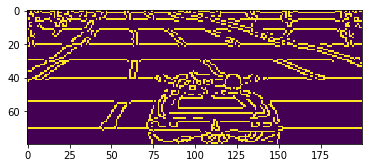

35 --- 0.9 --- [0.91407704]


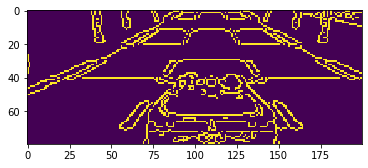

402 --- 0.9 --- [0.86420053]


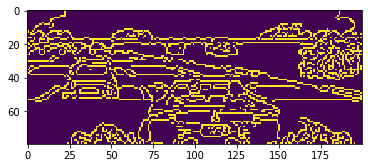

1154 --- 0.7 --- [0.7164309]


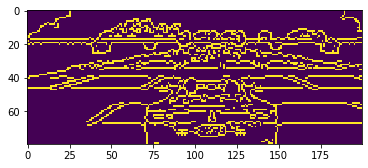

279 --- 0.9 --- [0.8719511]


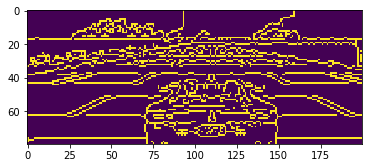

672 --- 0.9 --- [0.9498395]


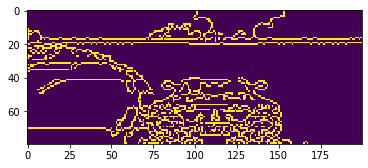

741 --- -0.4 --- [-0.04308682]


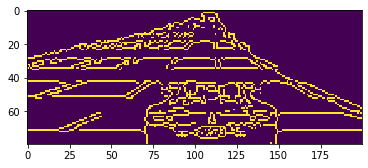

601 --- 0.6 --- [0.7060565]


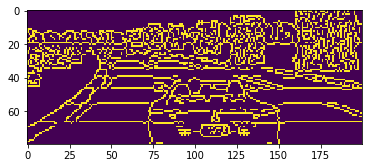

1824 --- 0.8 --- [0.76551205]


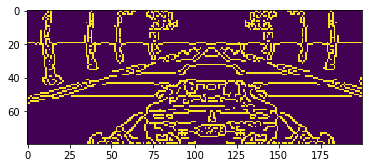

987 --- 0.9 --- [0.92426044]


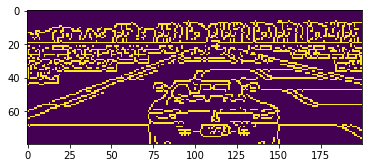

1724 --- 0.7 --- [0.77007633]


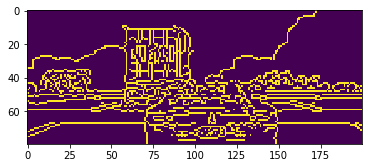

1096 --- 0.5 --- [0.5487433]


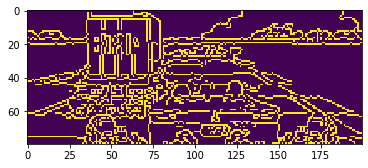

1239 --- 0.4 --- [0.51057744]


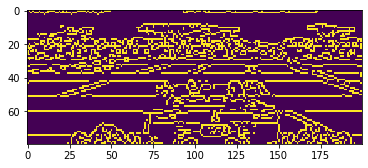

78 --- 0.9 --- [0.92580324]


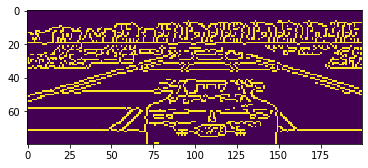

1731 --- 0.9 --- [0.92591953]


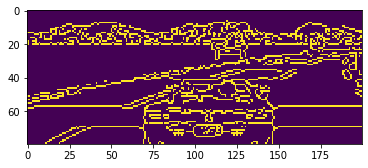

108 --- 0.9 --- [0.94711226]


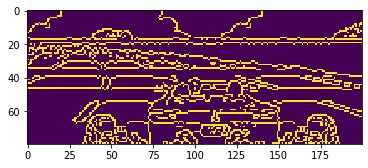

1115 --- 0.9 --- [0.8783091]


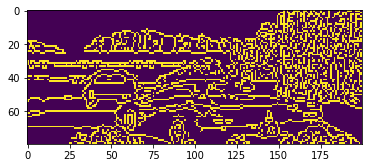

1838 --- -0.5 --- [-0.04308682]


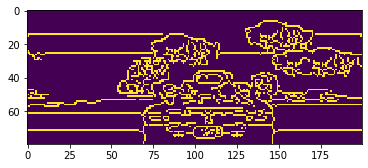

1535 --- 0.6 --- [0.66074026]


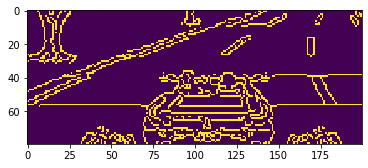

1452 --- 0.7 --- [0.751134]


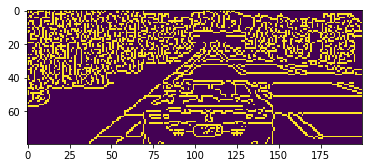

232 --- 0.3 --- [0.5091499]


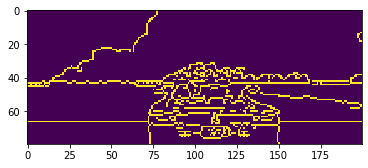

136 --- 0.9 --- [0.9160755]


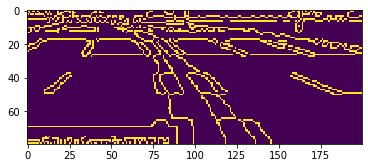

865 --- 0.9 --- [0.75891125]


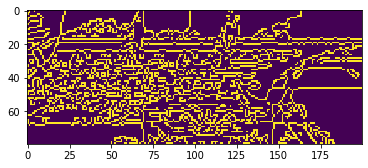

712 --- -0.5 --- [-0.04308682]


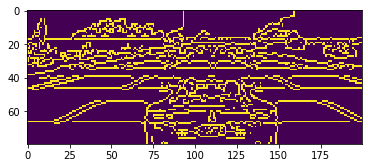

333 --- 0.9 --- [0.9471898]


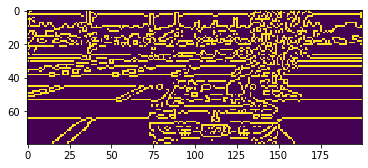

17 --- 0.6 --- [0.677323]


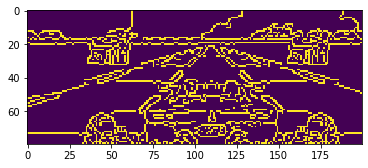

1261 --- 0.9 --- [0.9306081]


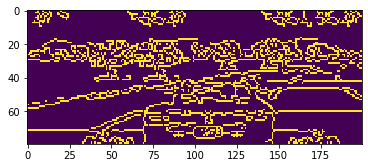

1580 --- 0.8 --- [0.8254772]


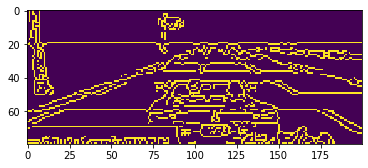

771 --- 0.8 --- [0.89359695]


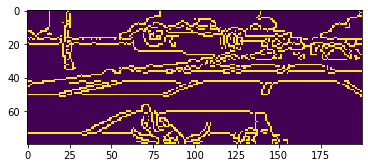

493 --- -0.5 --- [-0.04308682]


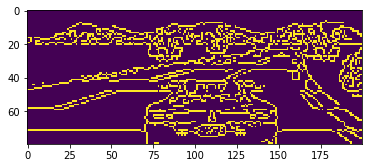

110 --- 0.9 --- [0.862296]


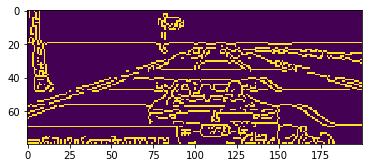

770 --- 0.8 --- [0.92429996]


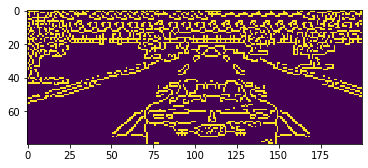

97 --- 0.9 --- [0.8843127]


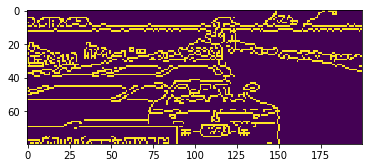

805 --- 0.1 --- [0.17631546]


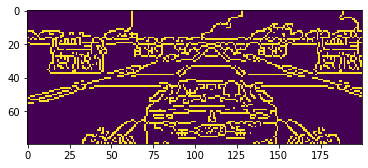

1255 --- 0.9 --- [0.93103904]


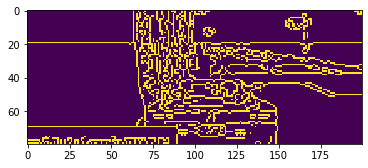

973 --- -0.2 --- [-0.04308682]


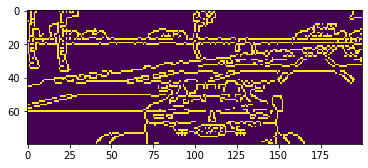

484 --- 0.8 --- [0.8467122]


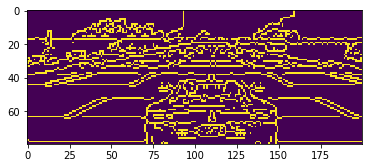

326 --- 0.9 --- [0.9409945]


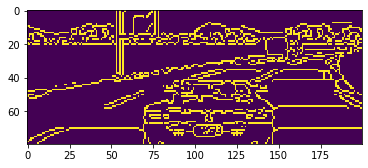

1394 --- 0.9 --- [0.876105]


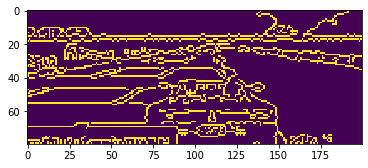

802 --- 0.3 --- [0.35196394]


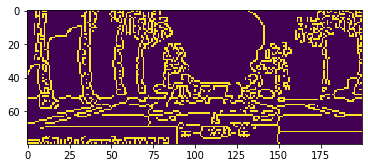

949 --- -0.9 --- [0.0225203]


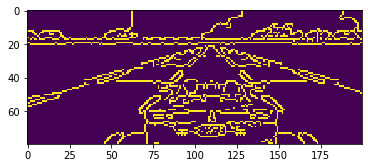

1292 --- 0.9 --- [0.8639295]


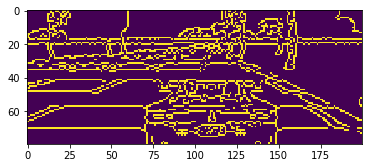

464 --- 0.6 --- [0.6391057]


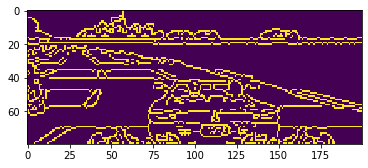

1167 --- 0.7 --- [0.6778017]


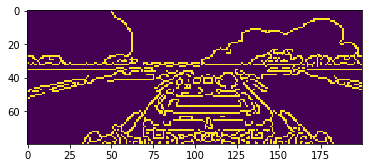

1282 --- 0.9 --- [0.81650114]


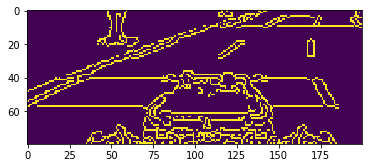

1453 --- 0.7 --- [0.6958041]


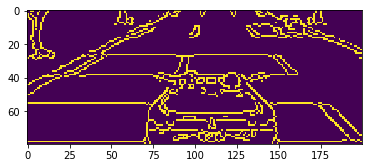

1433 --- 0.8 --- [0.85363495]


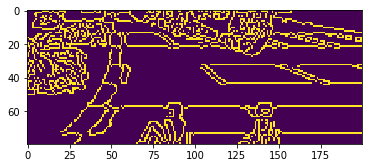

565 --- -0.5 --- [-0.04308682]


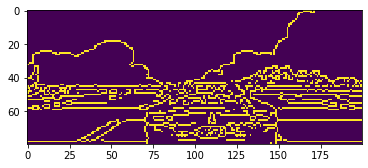

184 --- 0.9 --- [0.86018753]


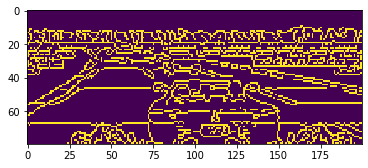

1738 --- 0.9 --- [0.8231903]


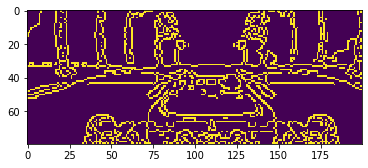

1014 --- 0.9 --- [0.900522]


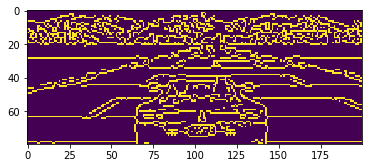

6 --- 0.9 --- [0.99784213]


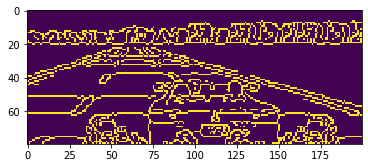

1681 --- 0.8 --- [0.82353485]


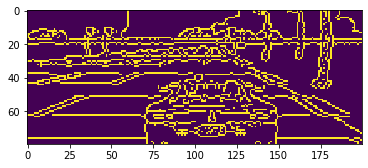

475 --- 0.5 --- [0.64515394]


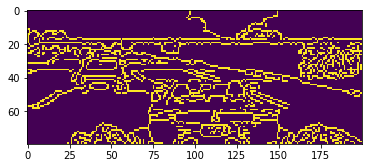

1153 --- 0.7 --- [0.62547696]


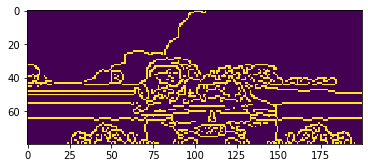

291 --- 0.9 --- [0.82205176]


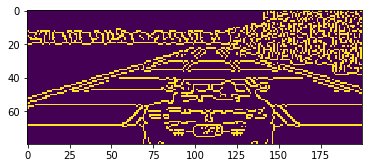

1872 --- 0.8 --- [0.80877554]


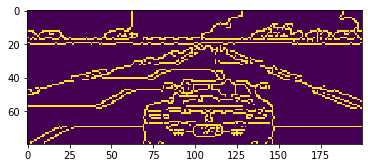

1293 --- 0.9 --- [0.85274005]


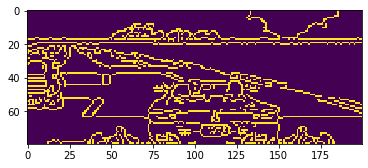

1166 --- 0.7 --- [0.67532104]


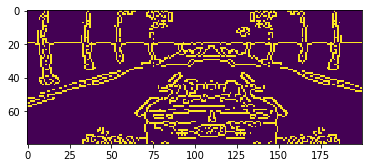

186 --- 0.9 --- [0.9706697]


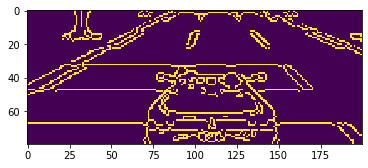

214 --- 0.9 --- [0.9112612]


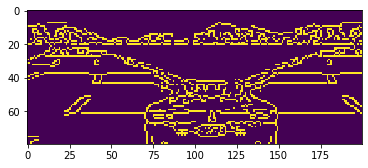

1645 --- -0.5 --- [-0.04234278]


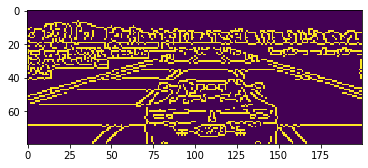

1759 --- 0.8 --- [0.8223801]


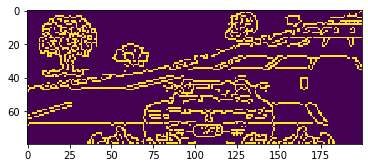

1571 --- 0.8 --- [0.82073814]


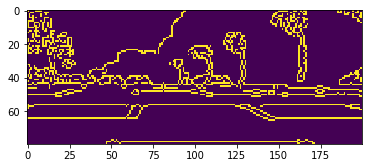

438 --- 0.0 --- [0.0264663]


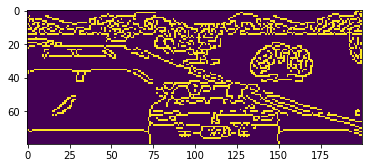

1611 --- 0.5 --- [0.5762192]


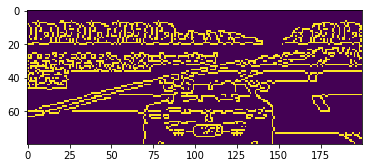

1869 --- 0.8 --- [0.72816205]


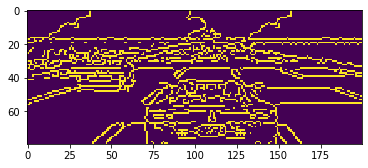

1126 --- 0.9 --- [0.91210115]


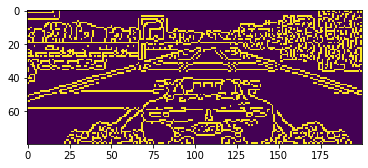

1767 --- 0.8 --- [0.7993929]


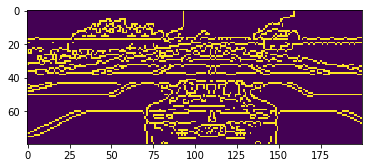

674 --- 0.9 --- [0.90799505]


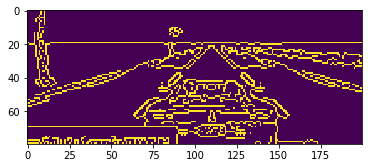

768 --- 0.9 --- [0.9409171]


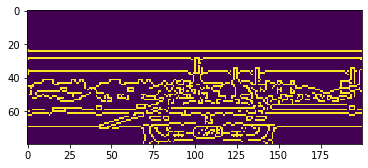

197 --- 0.9 --- [0.8660391]


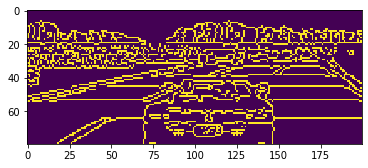

1714 --- 0.8 --- [0.8248967]


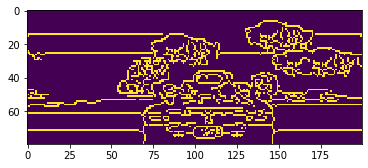

1535 --- 0.6 --- [0.66074026]


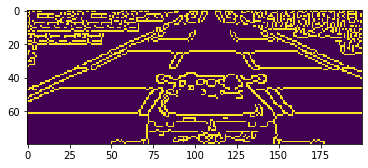

1845 --- 0.8 --- [0.8121268]


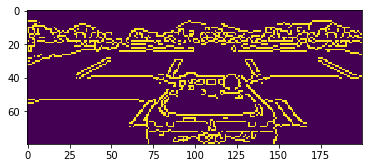

1623 --- 0.6 --- [0.73041016]


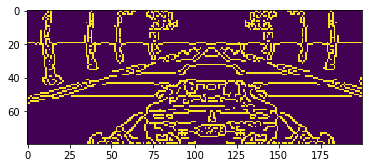

987 --- 0.9 --- [0.92426044]


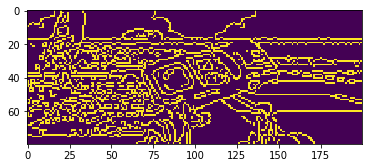

630 --- -0.5 --- [-0.04308682]


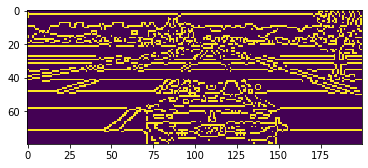

205 --- 0.9 --- [0.9401027]


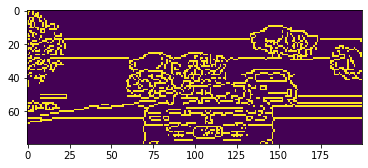

1520 --- 0.6 --- [0.6999162]


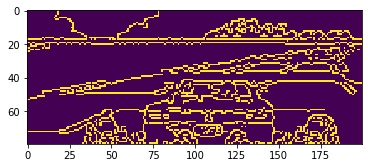

1304 --- 0.7 --- [0.75430936]


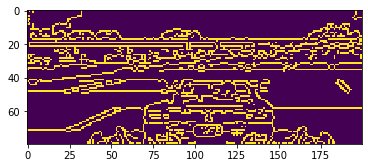

106 --- 0.9 --- [0.93325865]


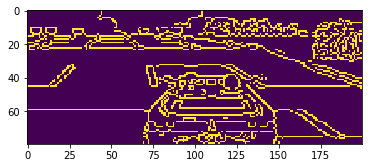

588 --- 0.8 --- [0.8814189]


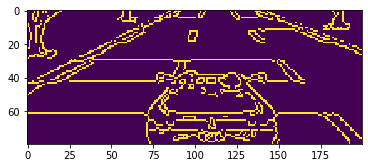

1480 --- 0.9 --- [0.95570296]


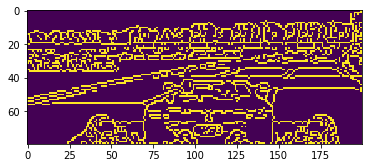

1924 --- 0.8 --- [0.84049225]


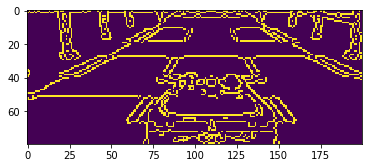

1012 --- 0.9 --- [0.8838385]


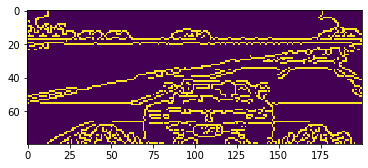

1305 --- 0.7 --- [0.78772235]


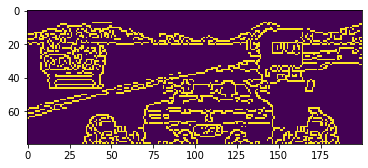

1396 --- 0.6 --- [0.6445115]


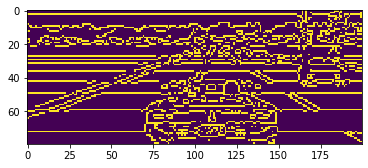

286 --- 0.9 --- [1.010204]


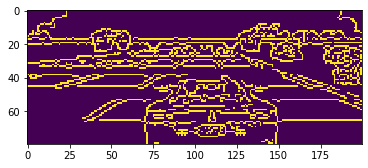

1071 --- 0.7 --- [0.71762437]


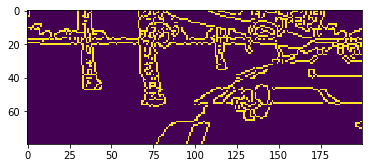

315 --- -0.1 --- [-0.04308682]


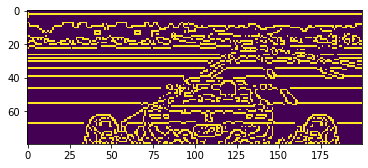

226 --- 0.3 --- [0.48435014]


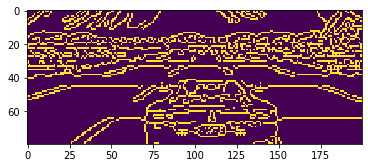

280 --- 0.9 --- [0.8784303]


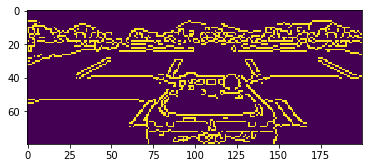

1623 --- 0.6 --- [0.73041016]


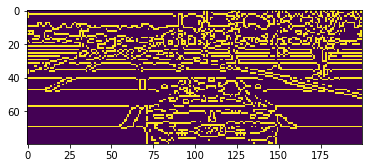

241 --- 0.9 --- [0.8441287]


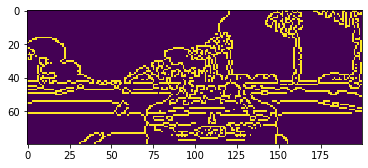

445 --- 0.9 --- [0.882644]


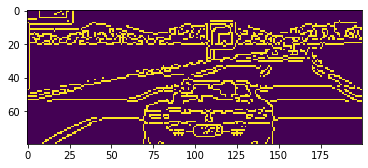

1391 --- 0.9 --- [0.8799914]


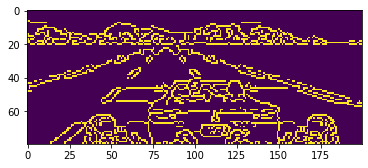

1329 --- 0.7 --- [0.7751872]


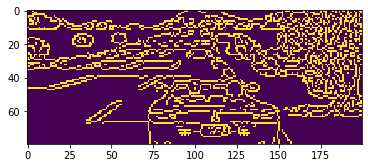

1619 --- 0.2 --- [0.30631444]


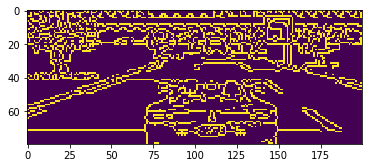

1500 --- 0.9 --- [0.9707014]


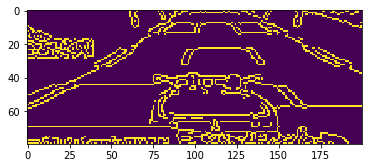

827 --- 0.9 --- [0.98498577]


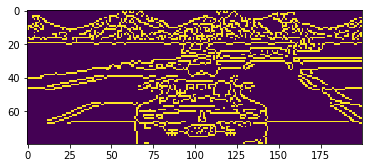

297 --- 0.8 --- [0.84313023]


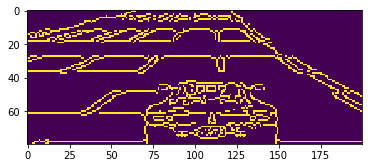

602 --- 0.6 --- [0.6166027]


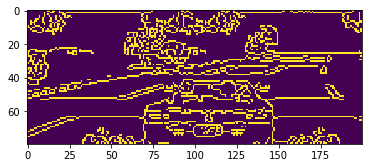

1576 --- 0.7 --- [0.79193944]


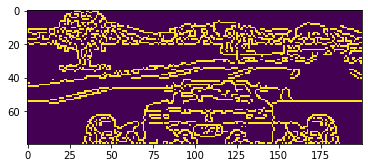

169 --- 0.9 --- [0.95876783]


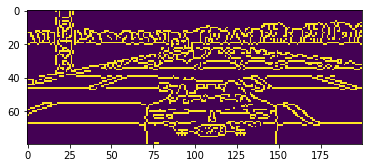

1689 --- 0.8 --- [0.793042]


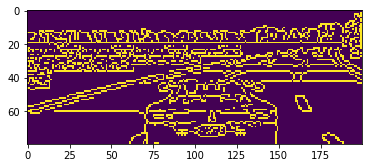

1774 --- 0.8 --- [0.74055225]


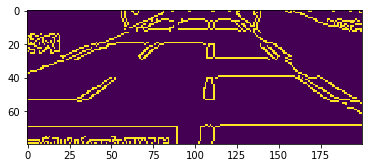

823 --- 0.0 --- [0.03478395]


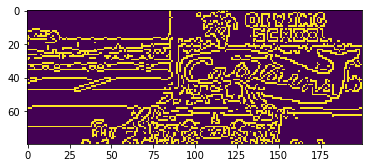

752 --- -0.5 --- [-0.04308682]


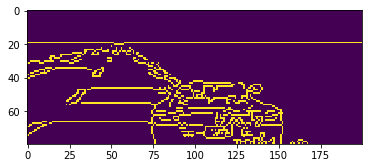

40 --- -0.1 --- [-0.0151844]


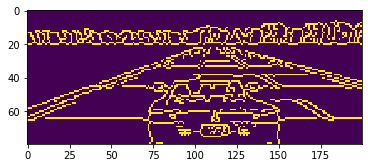

1683 --- 0.7 --- [0.7895509]


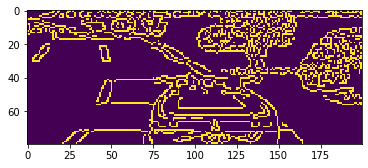

153 --- 0.2 --- [0.29603067]


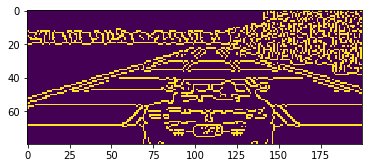

1872 --- 0.8 --- [0.80877554]


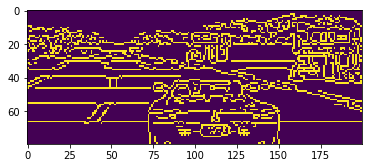

285 --- 0.4 --- [0.49167055]


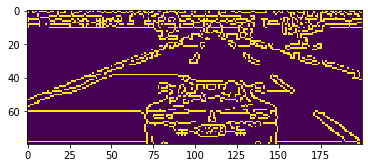

1494 --- 0.9 --- [0.8580233]


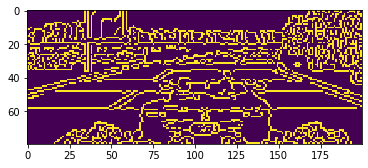

1769 --- 0.8 --- [0.8174816]


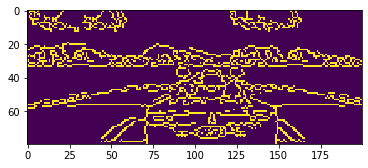

1354 --- 0.9 --- [0.8406234]


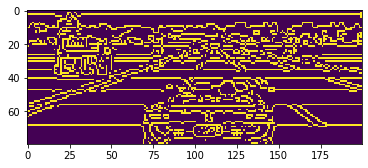

65 --- 0.9 --- [0.8864495]


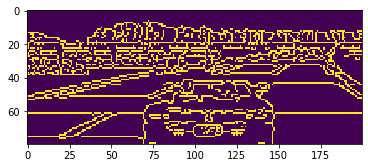

1715 --- 0.8 --- [0.8733043]


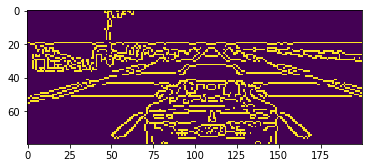

1002 --- 0.9 --- [1.0003833]


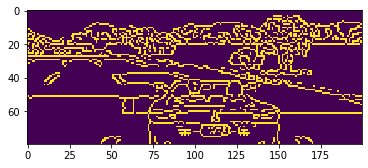

1602 --- 0.5 --- [0.5168283]


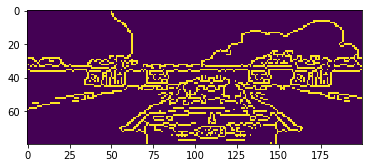

1275 --- 0.9 --- [0.9577432]


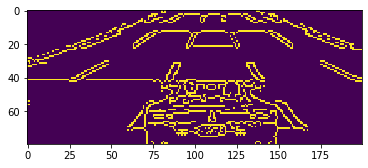

1638 --- 0.8 --- [0.81713516]


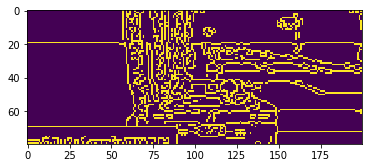

930 --- -0.1 --- [-0.04308682]


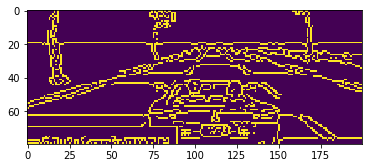

392 --- 0.8 --- [0.9018097]


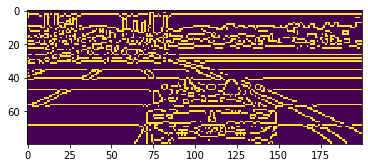

94 --- 0.6 --- [0.74850714]


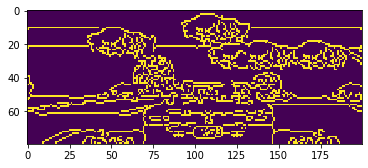

179 --- 0.9 --- [0.84940064]


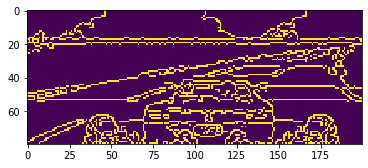

1303 --- 0.7 --- [0.7628795]


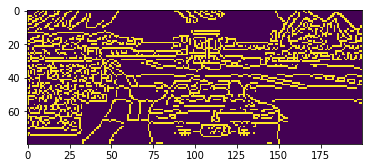

124 --- 0.8 --- [0.76854706]


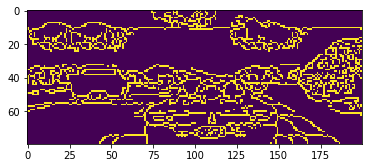

1363 --- 0.4 --- [0.43321905]


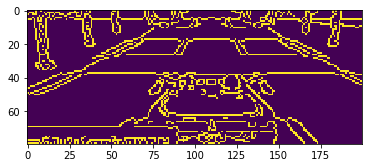

842 --- 0.9 --- [0.856549]


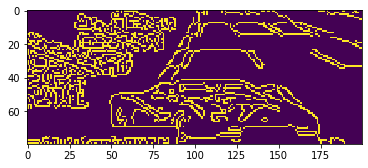

815 --- -0.1 --- [-0.04308682]


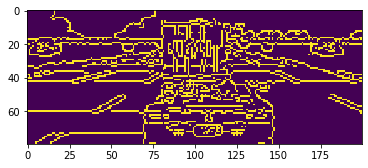

1205 --- 0.3 --- [0.46850592]


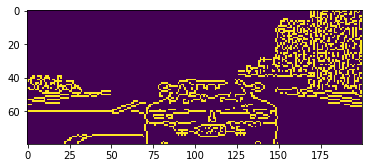

1937 --- 0.8 --- [0.88116235]


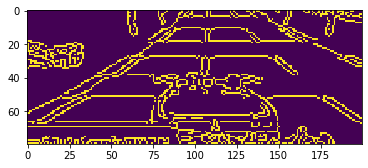

829 --- 0.8 --- [0.8547382]


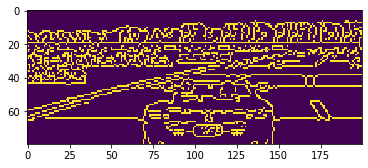

225 --- 0.6 --- [0.72429854]


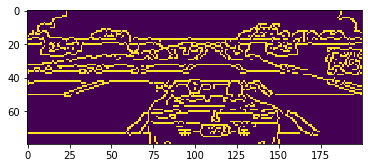

1073 --- 0.7 --- [0.7235648]


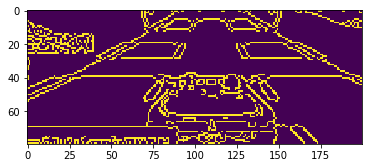

825 --- 0.9 --- [0.9116124]


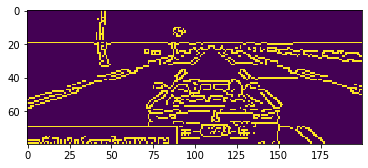

785 --- 0.9 --- [0.9484164]


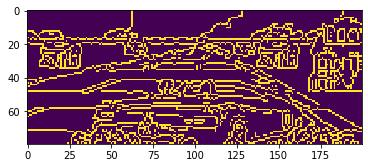

1246 --- -0.5 --- [-0.04308682]


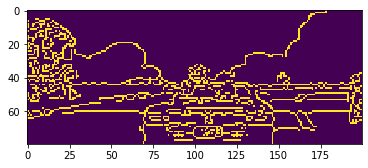

1225 --- 0.7 --- [0.7554565]


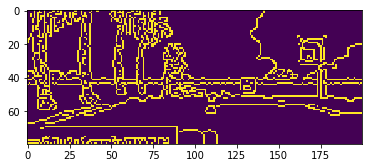

882 --- 0.9 --- [0.6230926]


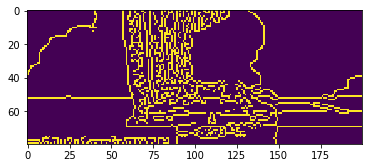

962 --- -0.1 --- [0.03639973]


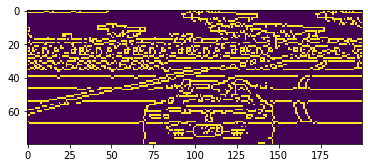

152 --- 0.9 --- [0.8866334]


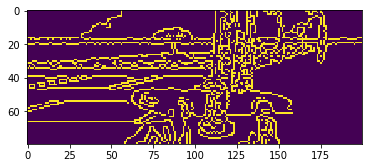

500 --- -0.5 --- [-0.04308682]


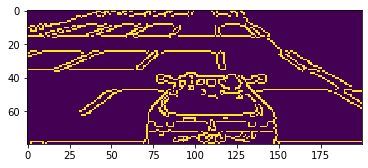

605 --- 0.6 --- [0.61581457]


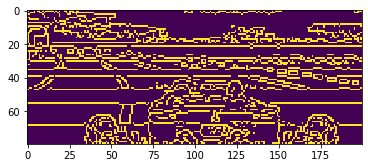

51 --- 0.7 --- [0.7610366]


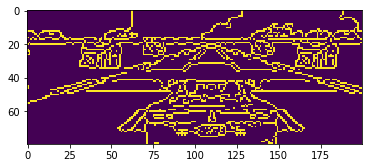

1252 --- 0.8 --- [0.88615066]


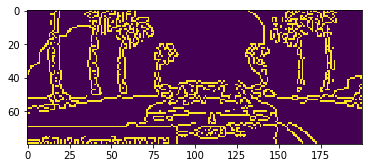

856 --- 0.9 --- [0.93592477]


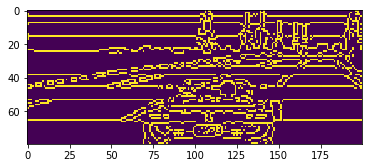

273 --- 0.8 --- [0.8925004]


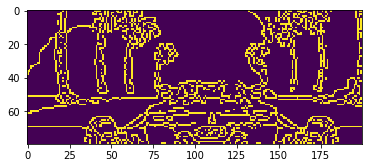

1016 --- 0.9 --- [0.9667123]


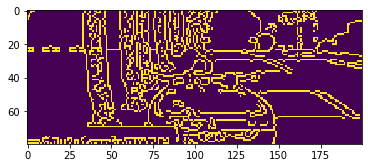

850 --- -0.1 --- [-0.04308682]


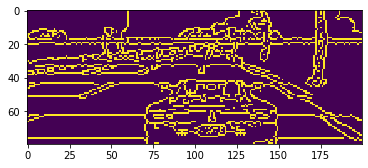

469 --- 0.6 --- [0.601641]


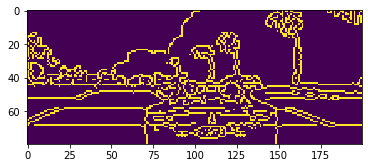

441 --- 0.9 --- [0.9620239]


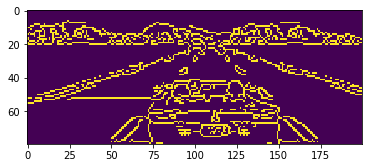

1330 --- 0.9 --- [0.95099974]


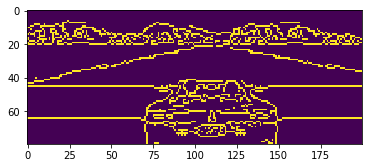

1341 --- 0.9 --- [0.92963606]


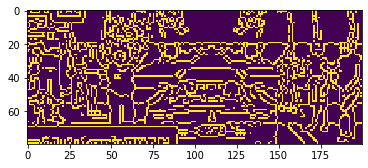

371 --- 0.9 --- [0.911479]


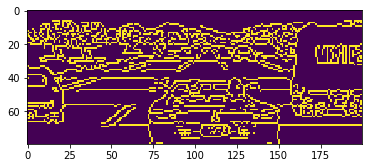

1555 --- 0.9 --- [0.89096993]


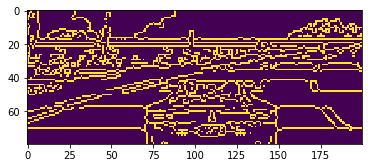

708 --- 0.5 --- [0.66757965]


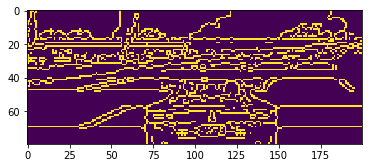

706 --- 0.9 --- [0.9558362]


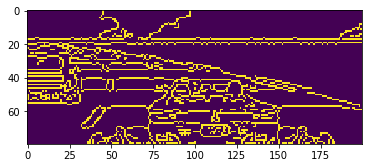

1165 --- 0.7 --- [0.6972613]


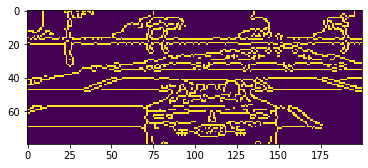

1052 --- 0.8 --- [0.9210902]


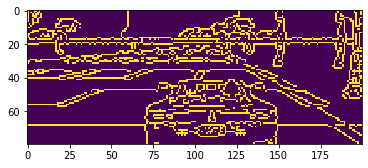

468 --- 0.6 --- [0.6327655]


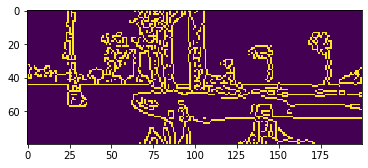

431 --- -0.5 --- [-0.04308682]


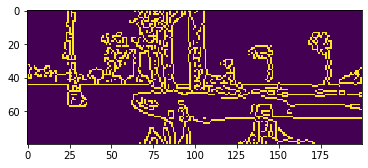

431 --- -0.5 --- [-0.04308682]


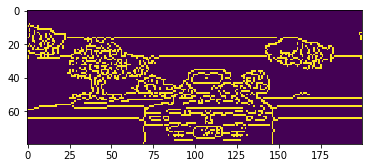

1534 --- 0.7 --- [0.7565056]


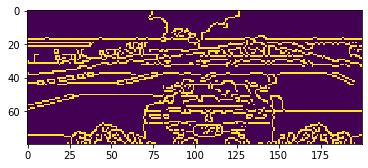

1145 --- 0.8 --- [0.91348445]


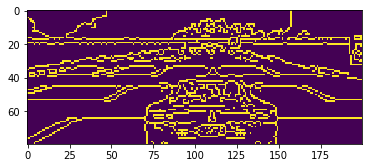

1177 --- 0.7 --- [0.7834448]


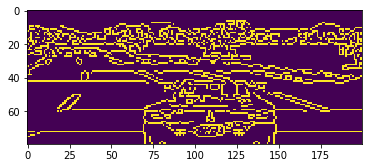

1591 --- 0.5 --- [0.64083236]


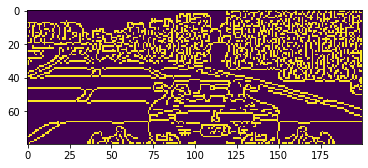

1911 --- 0.6 --- [0.6126263]


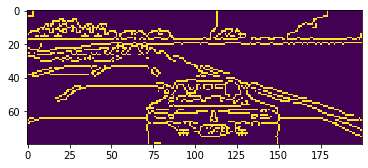

1170 --- 0.4 --- [0.46280193]


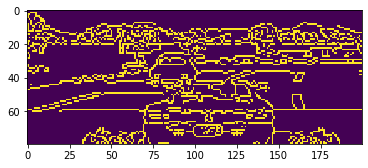

1546 --- 0.8 --- [0.8797223]


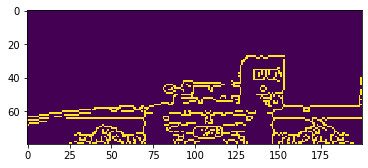

1902 --- 0.8 --- [0.8454844]


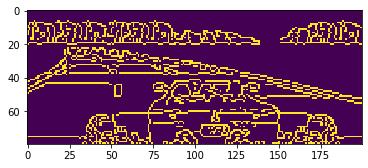

1679 --- 0.8 --- [0.8184664]


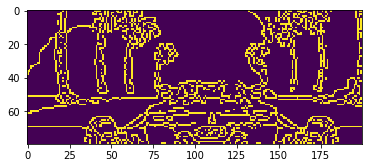

1016 --- 0.9 --- [0.9667123]


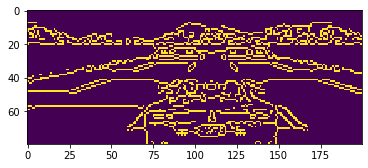

1641 --- 0.8 --- [0.847363]


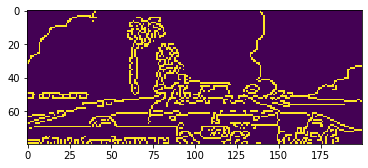

879 --- 0.9 --- [0.91510814]


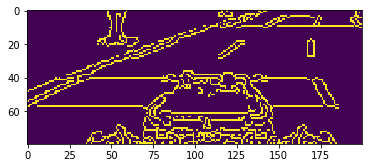

1453 --- 0.7 --- [0.6958041]


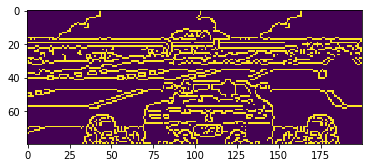

1143 --- 0.8 --- [0.72696376]


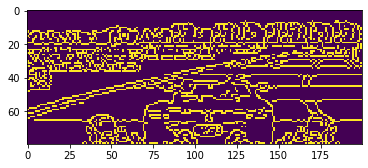

1930 --- 0.5 --- [0.6919623]


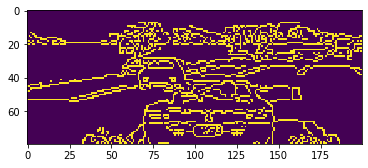

1547 --- 0.8 --- [0.8519614]


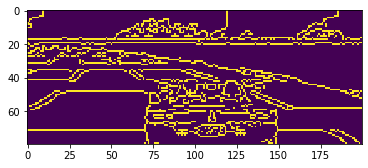

647 --- 0.6 --- [0.71808064]


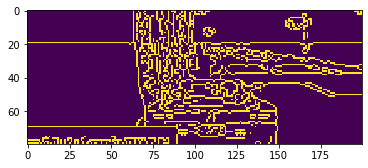

973 --- -0.2 --- [-0.04308682]


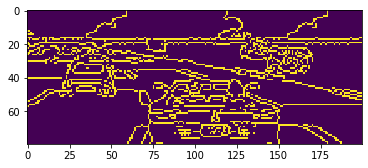

1156 --- 0.7 --- [0.7535761]


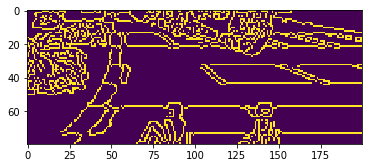

565 --- -0.5 --- [-0.04308682]


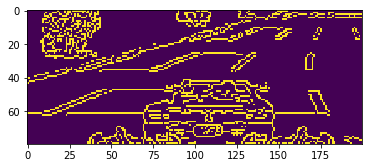

1572 --- 0.8 --- [0.8693622]


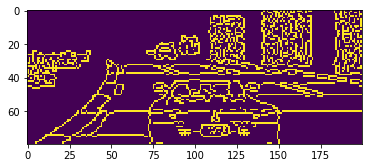

1827 --- 0.7 --- [0.6929964]


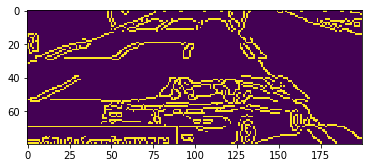

821 --- 0.0 --- [-0.04308682]


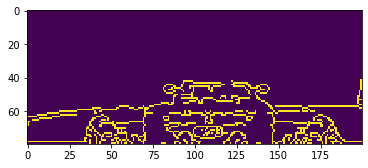

1892 --- 0.8 --- [0.8959339]


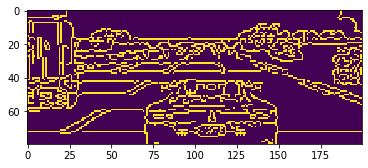

1069 --- 0.6 --- [0.6553492]


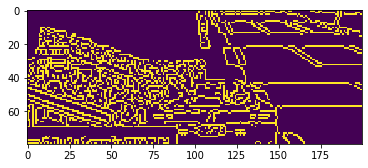

883 --- -0.1 --- [-0.0259999]


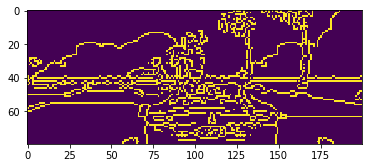

451 --- 0.9 --- [0.91827935]


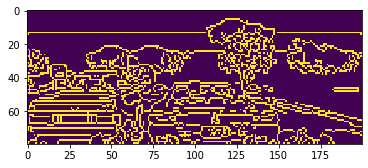

1511 --- 0.5 --- [0.42432925]


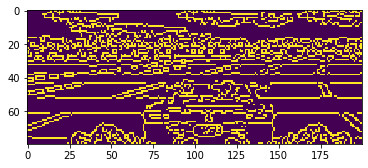

0 --- 0.9 --- [0.958162]


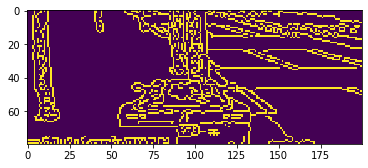

861 --- -0.5 --- [-0.04308682]


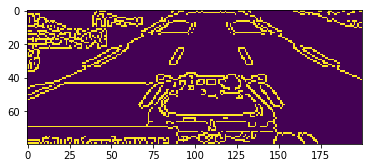

970 --- 0.9 --- [0.9211597]


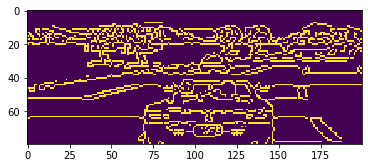

1540 --- 0.7 --- [0.78803337]


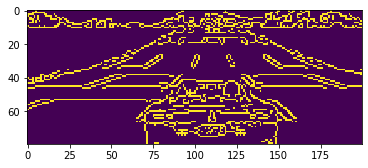

1629 --- 0.8 --- [0.8658323]


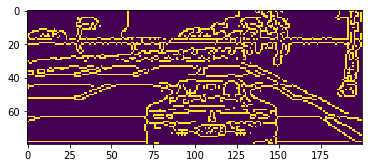

476 --- 0.5 --- [0.60464627]


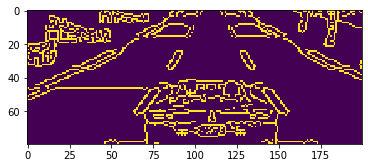

400 --- 0.9 --- [0.8038006]


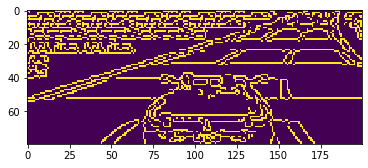

1709 --- 0.8 --- [0.865033]


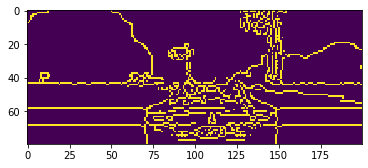

419 --- 0.5 --- [0.68686914]


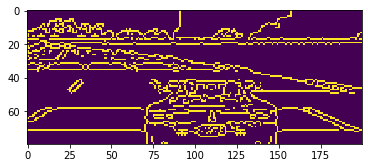

646 --- 0.7 --- [0.77258897]


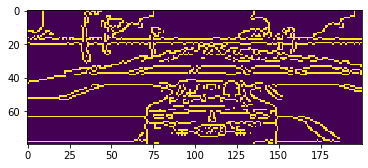

1042 --- 0.9 --- [0.9398539]


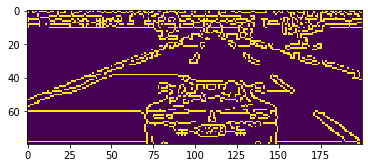

1494 --- 0.9 --- [0.8580233]


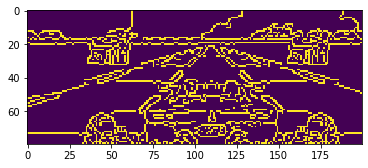

1261 --- 0.9 --- [0.9306081]


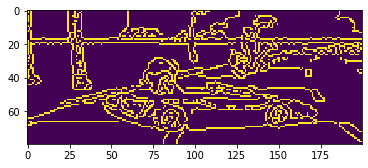

491 --- -0.5 --- [-0.04308682]


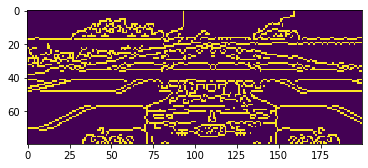

688 --- 0.9 --- [0.95100737]


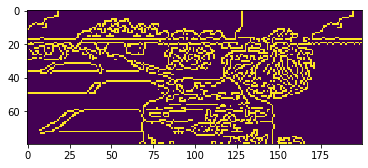

330 --- -0.3 --- [-0.04308682]


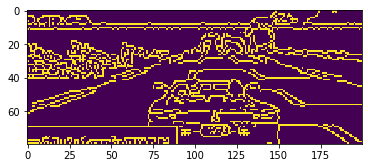

961 --- 0.9 --- [0.8595628]


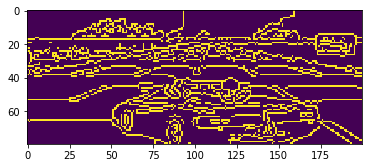

668 --- 0.0 --- [-0.04308682]


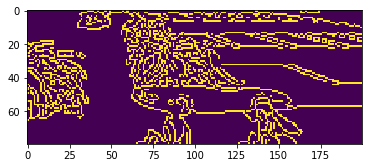

568 --- -0.5 --- [-0.04308682]


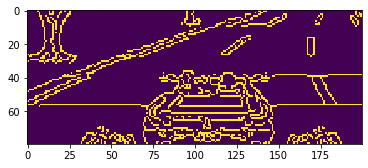

1452 --- 0.7 --- [0.751134]


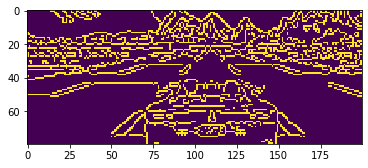

144 --- 0.9 --- [0.88436043]


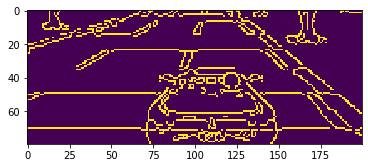

1475 --- 0.6 --- [0.69885784]


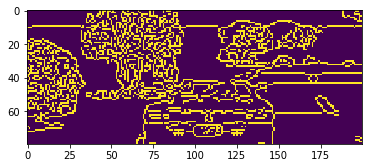

63 --- 0.1 --- [0.21121272]


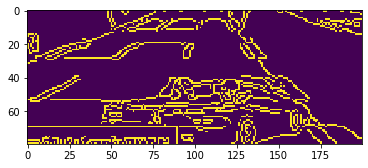

822 --- 0.0 --- [-0.04308682]


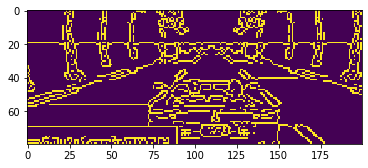

372 --- 0.9 --- [1.0594643]


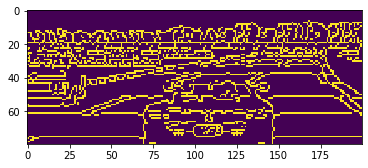

1719 --- 0.8 --- [0.84454787]


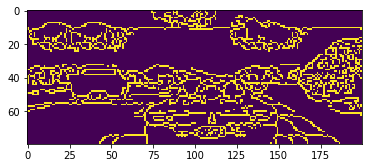

1363 --- 0.4 --- [0.43321905]


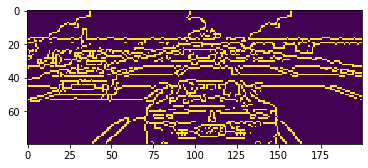

1127 --- 0.9 --- [0.8550497]


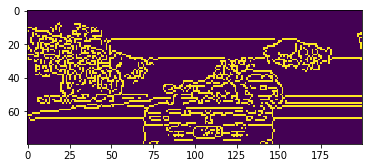

1522 --- 0.6 --- [0.6477356]


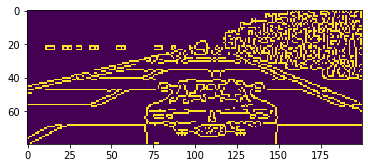

1876 --- 0.8 --- [0.872941]


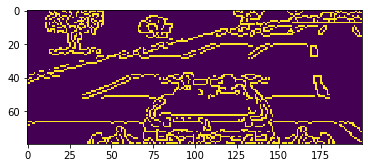

1573 --- 0.8 --- [0.8387513]


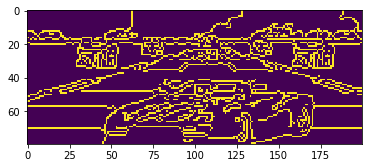

1244 --- -0.5 --- [-0.04308682]


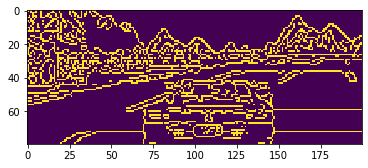

10 --- 0.8 --- [0.8602741]


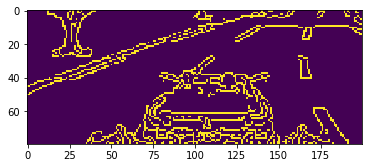

1448 --- 0.7 --- [0.73568237]


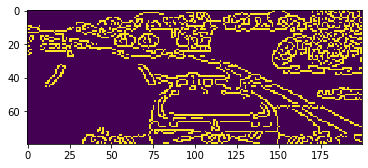

1612 --- 0.5 --- [0.59861803]


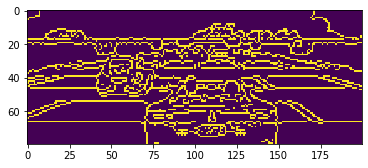

206 --- 0.9 --- [0.8741974]


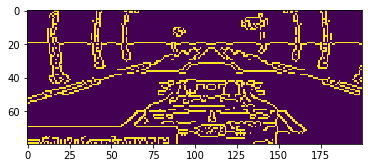

899 --- 0.9 --- [0.9338567]


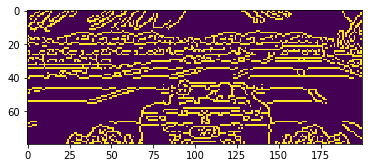

67 --- 0.9 --- [0.92255294]


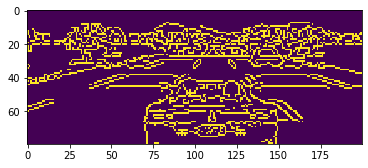

1556 --- 0.9 --- [0.8762387]


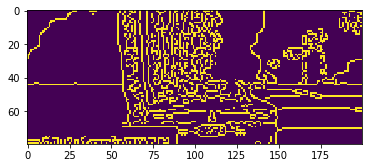

909 --- 0.3 --- [0.24374062]


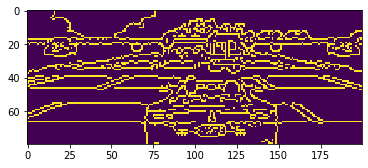

1203 --- 0.9 --- [0.8889548]


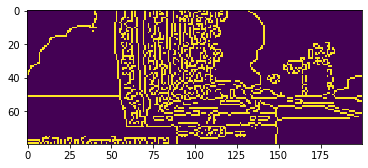

887 --- -0.5 --- [-0.04308682]


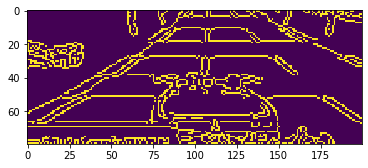

829 --- 0.8 --- [0.8547382]


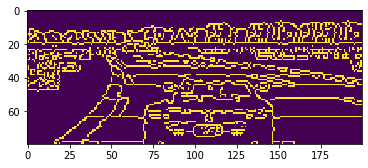

59 --- 0.9 --- [0.82889634]


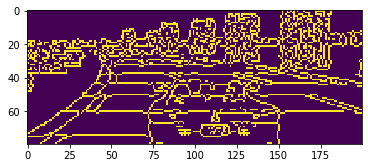

1825 --- 0.8 --- [0.7737054]


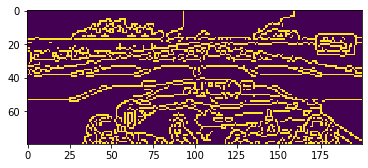

665 --- -0.1 --- [-0.04308682]


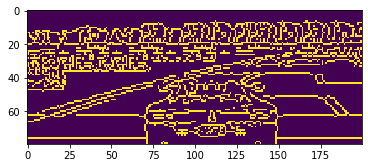

101 --- 0.6 --- [0.70903856]


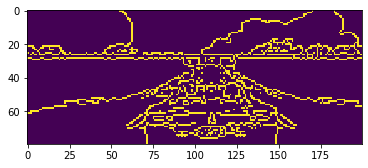

1285 --- 0.9 --- [0.89692533]


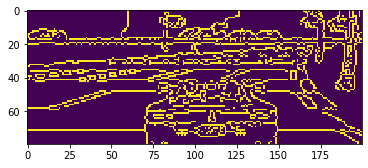

478 --- 0.7 --- [0.73916805]


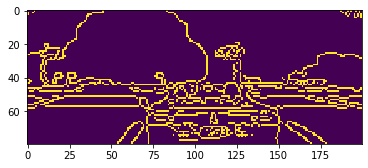

1033 --- 0.9 --- [0.906726]


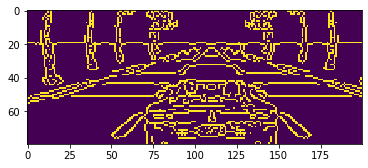

344 --- 0.9 --- [0.9035191]


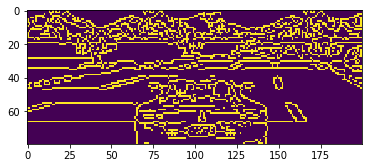

109 --- 0.9 --- [0.964783]


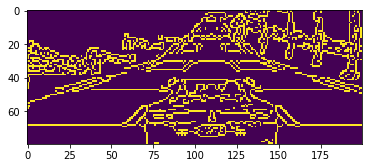

1008 --- 0.9 --- [0.94631374]


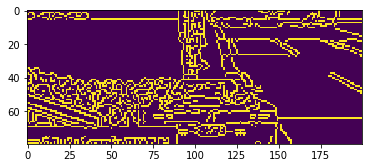

837 --- -0.1 --- [-0.04308682]


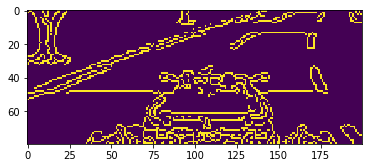

1451 --- 0.7 --- [0.74200344]


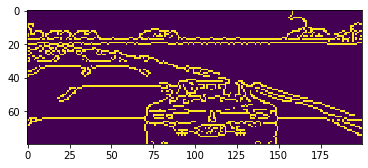

654 --- 0.4 --- [0.45266512]


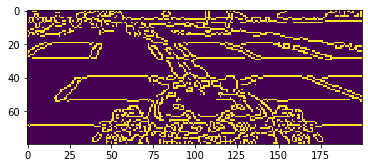

1030 --- 0.7 --- [0.6671082]


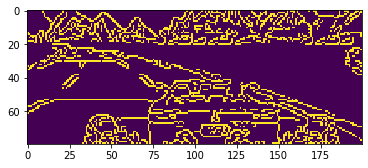

79 --- 0.6 --- [0.588118]


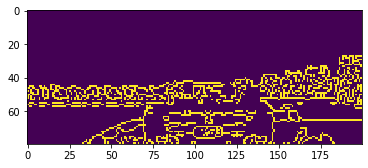

1906 --- 0.3 --- [0.44547388]


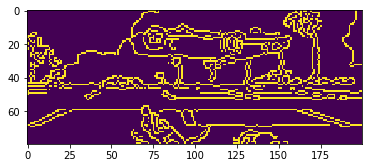

426 --- -0.5 --- [-0.04308682]


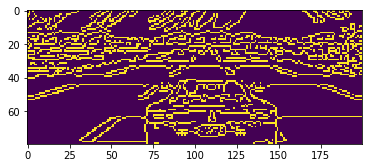

198 --- 0.9 --- [0.83970124]


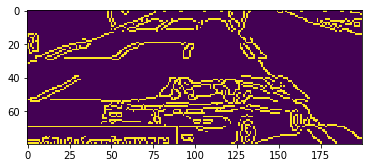

821 --- 0.0 --- [-0.04308682]


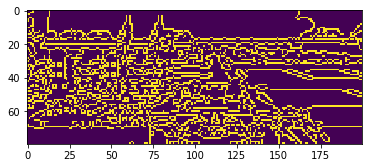

717 --- -0.5 --- [-0.04308682]


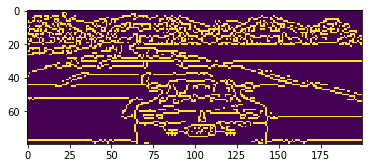

215 --- 0.9 --- [0.97536856]


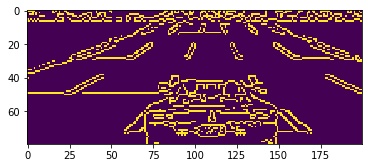

1630 --- 0.8 --- [0.8109858]


In [15]:
for i in np.random.randint(0,len(imgs),350):
    plt.imshow(imgs[i][:,:,0])
    plt.show()
    print(i,'---',numbers[i],'---',model.predict(np.expand_dims(imgs[i],axis=0))[0])

In [ ]:
numbers[59] = 0
numbers[173] = 0
numbers[130] = 0

In [ ]:
def cria_curva_roc_auc(modelo,df_verificacao,df_target):
    predictions = modelo.predict(df_verificacao)
    fpr, tpr, threshold = roc_curve(df_target, predictions[:])
    plt.figure(figsize=(8,8))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(df_target, predictions[:]))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic REAIS')
    plt.legend(loc="lower right")
    plt.show()

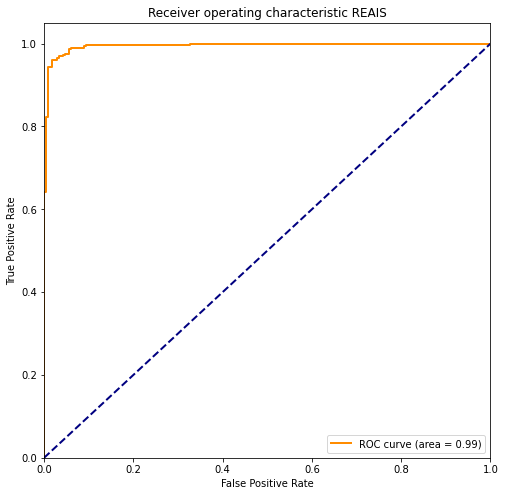

In [108]:
cria_curva_roc_auc(model,imgs,numbers)

In [ ]:
def retorna_limiar_escore(modelo,df_verificacao,df_target):
    #Imprimindo limiar de Escore
    predictions = modelo.predict(df_verificacao)
    fpr, tpr, threshold = roc_curve(df_target, predictions[:])
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    return list(roc_t['threshold'])[0]

In [110]:
retorna_limiar_escore(model,imgs,numbers)

0.8278834819793701